In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [16]:
# Read in all feature files

initial_files = pd.read_csv('soundfile_names.csv')
initial_files['filename'] = "Data/genres_original/" + initial_files['label'] + "/" + initial_files['filename']
df = pd.DataFrame()
for i in initial_files['label'].unique():
    df = pd.concat([df, pd.read_csv(i + "_3secfeatures.csv")])

df = pd.merge(df, initial_files, on = 'filename')
df = df.reset_index(drop = True)

In [17]:
df

,filename,segment,length,chroma_stft_mean,chroma_stft_std,chroma_stft_skew,chroma_stft_kurtosis,chroma_stft_median,chroma_stft_min,chroma_cqt_mean,...,mfcc_19_median,mfcc_19_min,mfcc_20_mean,mfcc_20_std,mfcc_20_skew,mfcc_20_kurtosis,mfcc_20_median,mfcc_20_min,tempo,label
0,Data/genres_original/blues/blues.00000.wav,0,3.001315,0.335489,0.301540,1.020681,-0.117478,0.233150,0.006450,0.540237,...,-5.339299,-17.226530,-0.268043,6.606342,0.461468,-0.398294,-0.741886,-12.212023,129.199219,blues
1,Data/genres_original/blues/blues.00000.wav,1,3.001315,0.343388,0.294134,1.063305,-0.005006,0.242065,0.008723,0.534423,...,-3.035424,-27.615917,5.790949,7.757394,0.311586,-0.664105,4.828741,-9.651761,123.046875,blues
2,Data/genres_original/blues/blues.00000.wav,2,3.001315,0.347768,0.304301,0.901502,-0.354802,0.249102,0.001904,0.492449,...,-2.821123,-14.269703,2.599745,5.728702,-0.075088,0.232092,2.096988,-14.088466,123.046875,blues
3,Data/genres_original/blues/blues.00000.wav,3,3.001315,0.361880,0.293975,0.932154,-0.206249,0.277121,0.003071,0.546121,...,-3.458435,-20.385891,3.676203,5.641251,-0.326931,-0.449859,4.313828,-11.092068,123.046875,blues
4,Data/genres_original/blues/blues.00000.wav,4,3.001315,0.333237,0.295735,1.137966,0.120821,0.223887,0.014125,0.523493,...,-3.374337,-14.924772,0.626625,5.455158,0.047006,-0.315896,0.740305,-10.675707,123.046875,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,Data/genres_original/rock/rock.00099.wav,5,3.001315,0.350875,0.285528,1.104394,0.155631,0.259542,0.014124,0.275669,...,-6.616860,-22.512262,1.590725,6.191266,0.490316,-0.025570,1.512384,-9.716410,123.046875,rock
9986,Data/genres_original/rock/rock.00099.wav,6,3.001315,0.372202,0.287078,0.947353,-0.194736,0.283751,0.009554,0.264091,...,-11.639359,-32.296060,0.470529,4.267436,0.077416,-0.204009,0.562108,-8.811907,123.046875,rock
9987,Data/genres_original/rock/rock.00099.wav,7,3.001315,0.346419,0.296543,0.971608,-0.123995,0.260481,0.005840,0.279372,...,1.916148,-16.393026,-0.258643,6.516179,0.014085,0.052162,-0.519264,-20.869581,123.046875,rock
9988,Data/genres_original/rock/rock.00099.wav,8,3.001315,0.385345,0.288441,0.827770,-0.362811,0.310581,0.010072,0.245671,...,1.579786,-10.110823,0.668112,3.581738,-0.045326,-0.510658,1.187700,-7.308484,123.046875,rock


In [18]:
unique_filenames = df['filename'].unique()

train_files, temp_files = train_test_split(unique_filenames, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=2/3, random_state=42)

train_df = df[df['filename'].isin(train_files)]
val_df = df[df['filename'].isin(val_files)]
test_df = df[df['filename'].isin(test_files)]

In [19]:
X_cols = df.drop(columns = ['filename', 'segment', 'label', 'length']).columns
y_cols = 'label'

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 1, 185, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 92, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 1, 90, 64)           │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 45, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 1, 43, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 1, 21, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2688)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         344,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 376,522 (1.44 MB)

 Trainable params: 376,522 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4538 - loss: 1.5612 - val_accuracy: 0.6150 - val_loss: 1.1580
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7694 - loss: 0.6770 - val_accuracy: 0.6870 - val_loss: 0.9646
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8524 - loss: 0.4438 - val_accuracy: 0.7010 - val_loss: 0.9999
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9055 - loss: 0.2905 - val_accuracy: 0.6790 - val_loss: 1.2367
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9436 - loss: 0.1840 - val_accuracy: 0.7090 - val_loss: 1.2479
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9622 - loss: 0.1148 - val_accuracy: 0.7040 - val_loss: 1.5143
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9818 - loss: 0.0639 - val_accuracy: 0.7110 - val_loss: 1.4292
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9679 - loss: 0.1093 - val_acc

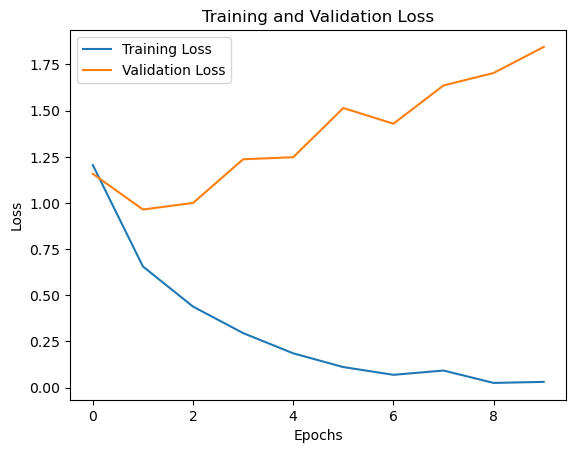

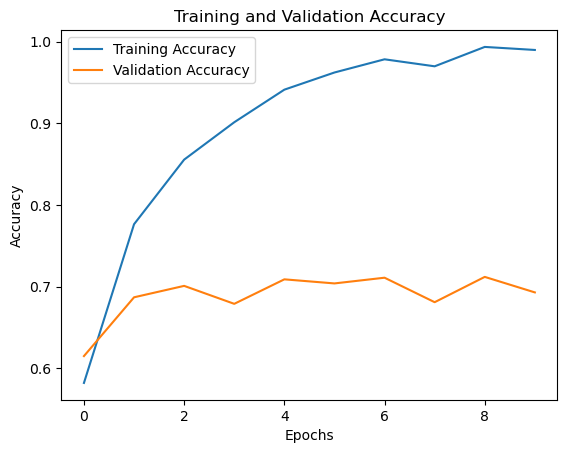

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Load the CSV files (features and metadata)
# Load the soundfile names (metadata with labels)
initial_files = pd.read_csv('soundfile_names.csv')
initial_files['filename'] = "Data/genres_original/" + initial_files['label'] + "/" + initial_files['filename']

# Create an empty DataFrame to store features
df = pd.DataFrame()

# Read features for each label
for i in initial_files['label'].unique():
    df = pd.concat([df, pd.read_csv(i + "_3secfeatures.csv")])

# Merge the features with the filenames and labels
df = pd.merge(df, initial_files, on='filename')
df = df.reset_index(drop=True)

# Step 2: Extract Features and Labels
# Define feature columns (excluding 'filename', 'label', 'segment', and 'length')
X_cols = [col for col in df.columns if col not in ['filename', 'label', 'segment', 'length']]
y_cols = 'label'

# Extract features and labels
X = df[X_cols].values  # Feature matrix
y = df[y_cols].values  # Labels (genres)

# Step 3: Normalize the Features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Reshape for CNN input (samples, time_steps, features, channels)
X_reshaped = X_normalized.reshape(X_normalized.shape[0], 1, X_normalized.shape[1], 1)  # 1 time_step, features, 1 channel

# Step 4: Encode the Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the labels
y_categorical = to_categorical(y_encoded)

# Step 5: Split the Data into Train, Validation, and Test Sets
unique_filenames = df['filename'].unique()

# Split filenames into training, validation, and test sets
train_files, temp_files = train_test_split(unique_filenames, test_size=0.3, random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=2/3, random_state=42)

# Filter DataFrames based on the filenames in each split
train_df = df[df['filename'].isin(train_files)]
val_df = df[df['filename'].isin(val_files)]
test_df = df[df['filename'].isin(test_files)]

# Extract features and labels for each split
X_train = train_df[X_cols].values
y_train = train_df[y_cols].values

X_val = val_df[X_cols].values
y_val = val_df[y_cols].values

X_test = test_df[X_cols].values
y_test = test_df[y_cols].values

# Normalize the features for each split
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)  # Use the same scaler for validation
X_test_normalized = scaler.transform(X_test)  # Use the same scaler for test

# Reshape for CNN input
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape[0], 1, X_train_normalized.shape[1], 1)
X_val_reshaped = X_val_normalized.reshape(X_val_normalized.shape[0], 1, X_val_normalized.shape[1], 1)
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape[0], 1, X_test_normalized.shape[1], 1)

# Encode labels into integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the labels
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Step 6: Build the CNN Model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (1, 3), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], X_train_reshaped.shape[3])),
    layers.MaxPooling2D((1, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (1, 3), activation='relu'),
    layers.MaxPooling2D((1, 2)),

    # Third Convolutional Layer
    layers.Conv2D(128, (1, 3), activation='relu'),
    layers.MaxPooling2D((1, 2)),

    # Flatten the 3D outputs to 1D
    layers.Flatten(),
    
    # Fully Connected Layer
    layers.Dense(128, activation='relu'),
    
    # Output Layer for multi-class classification
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Step 7: Train the Model
history = model.fit(
    X_train_reshaped, y_train_categorical,
    validation_data=(X_val_reshaped, y_val_categorical),
    epochs=10,  # You can adjust the number of epochs
    batch_size=32  # You can adjust the batch size
)

# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test_categorical, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Step 9: Visualize the Training and Validation Loss/Accuracy
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the trained model (optional)
model.save('music_genre_cnn_model.h5')


In [21]:
# Generate class probabilities
y_pred_probs = model.predict(X_test_reshaped)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [22]:
# Convert probabilities to predicted class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_categorical, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred_labels == y_true_labels)
print(f"Accuracy: {accuracy}")


Accuracy: 0.622


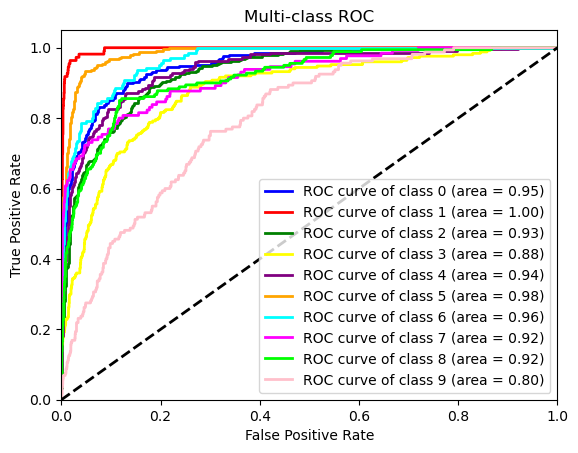

In [23]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
n_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['blue', 'red', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'lime', 'pink'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


In [24]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

       blues       0.84      0.62      0.71       250
   classical       0.83      0.92      0.87       110
     country       0.84      0.47      0.61       320
       disco       0.53      0.54      0.54       250
      hiphop       0.68      0.65      0.67       220
        jazz       0.85      0.79      0.82       240
       metal       0.66      0.69      0.67       140
         pop       0.53      0.70      0.60       130
      reggae       0.62      0.56      0.59       180
        rock       0.23      0.49      0.31       160

    accuracy                           0.62      2000
   macro avg       0.66      0.64      0.64      2000
weighted avg       0.68      0.62      0.64      2000



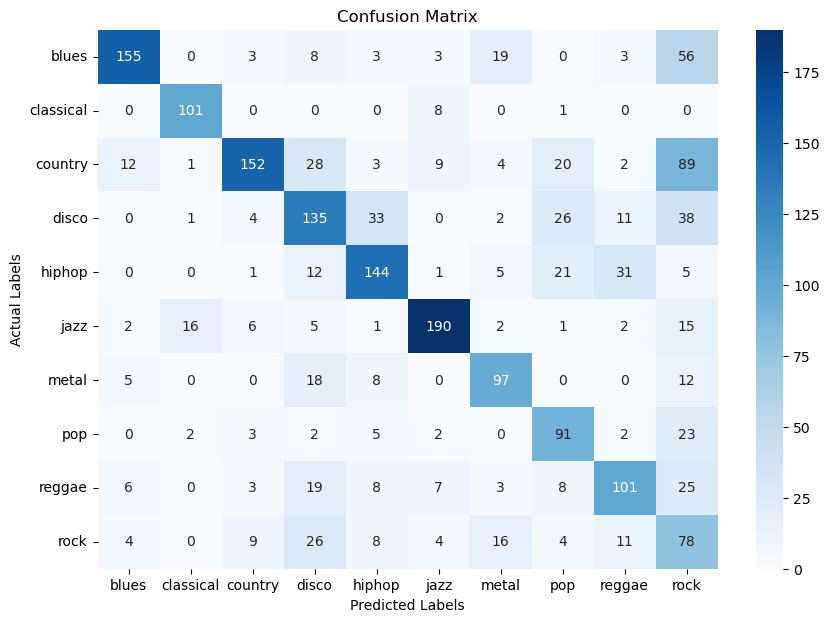

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.622
Precision: 0.6607594592981767
Recall: 0.6440862193362193
F1-Score: 0.6392961524014007
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.62      0.71       250
           1       0.83      0.92      0.87       110
           2       0.84      0.47      0.61       320
           3       0.53      0.54      0.54       250
           4       0.68      0.65      0.67       220
           5       0.85      0.79      0.82       240
           6       0.66      0.69      0.67       140
           7       0.53      0.70      0.60       130
           8       0.62      0.56      0.59       180
           9       0.23      0.49      0.31       160

    accuracy                           0.62      2000
   macro avg       0.66      0.64      0.64      2000
weighted avg       0.68      0.62      0.64      2000



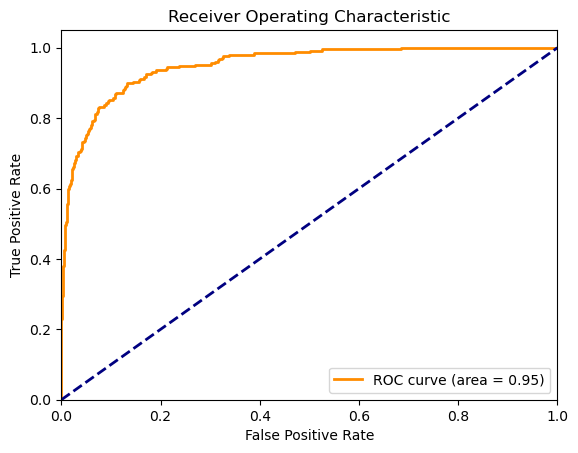

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, roc_curve, auc
from tensorflow.keras.models import load_model

# Assuming you have already loaded your model
# model = load_model('path_to_your_model.h5')

# Load test data
# X_test_reshaped, y_test_categorical are already defined in your session

# Predict probabilities for each class
y_pred_probs = model.predict(X_test_reshaped)

# Convert probabilities to predicted class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_categorical, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true_labels, y_pred_labels, average='macro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")

# Classification report for a detailed performance overview
report = classification_report(y_true_labels, y_pred_labels)
print("Classification Report:\n", report)

# ROC Curve for a specific class - let's say the first class in a binary or multi-class scenario
fpr, tpr, _ = roc_curve(y_test_categorical[:, 0], y_pred_probs[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [14]:
# Example of a deeper architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], X_train_reshaped.shape[3])),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])


ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 187, 1)`, `kernel shape=(3, 3, 1, 32)`, `dilation_rate=[1 1]`.